In [1]:
import matplotlib
matplotlib.use('TkAgg')

In [2]:
#Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#mesmo modelo usando scipy
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

/home/dataanalysis/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
#Pacote sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [ ]:
#Cross validation
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [65]:
#Ridge e Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV


In [5]:
#Importa o arquivo
df_salario = pd.read_excel('/media/sf_FormacaoCientistaDeDados/Portfolio/Stats_salary/NBA_Players.xlsx',encoding='latin-1')

In [6]:
#resumo das informaçoes sobre o dataset
df_salario.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24625 entries, 0 to 24624
Data columns (total 54 columns):
#                     24624 non-null float64
Season Start          24624 non-null float64
Player Name           24624 non-null object
Player Salary in $    10978 non-null object
Pos                   24624 non-null object
Age                   24616 non-null float64
Tm                    24624 non-null object
G                     24624 non-null float64
GS                    18233 non-null float64
MP                    24138 non-null float64
PER                   24101 non-null float64
TS%                   24538 non-null float64
3PAr                  18839 non-null float64
FTr                   24525 non-null float64
ORB%                  20792 non-null float64
DRB%                  20792 non-null float64
TRB%                  21571 non-null float64
AST%                  22555 non-null float64
STL%                  20792 non-null float64
BLK%                  20792 non-null flo

### De acordo com a informação acima, vamos retirar as colunas "blanl" e "blank2" , alterar a coluna referente ao salario para float e renomear algumas variaveis.

In [7]:
#remove as colunas
df_salario.drop(["#",'blanl','blank2'],axis= 1 ,inplace=True)
# alteração 
df_salario.rename(columns={'Season Start': 'Start','Player Name':'Player','Player Salary in $':'Salary'},inplace=True)

### Nosso propósito é prever o salário de um jogador da nba.

In [8]:
df_salario  = df_salario[df_salario['Salary'].notnull()]

In [9]:
df_salario = df_salario[df_salario['Start'].notnull()]

In [10]:
df_salario = df_salario[df_salario['Start']>=2012]

In [11]:
df_salario = df_salario[df_salario['FTr'].notnull()]
df_salario = df_salario[df_salario['FT%'].notnull()]
df_salario = df_salario[df_salario['2P%'].notnull()]
#converte coluna para float
df_salario['Salary'] = df_salario['Salary'].astype('float')

### Atribuindo zero a coluna "3PA" onde há valor nulo

In [12]:
#df_salario[df_salario['3PA']==0][['3PA','3P%']].head()
df_salario.loc[df_salario['3PA']==0, ['3P%']]=0

In [13]:
#Visualiza as primeiras linhas do arquivo
df_salario.describe()

,Start,Salary,Age,G,GS,MP,PER,TS%,3PAr,FTr,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,2695.000000,2.695000e+03,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,...,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.000000,2695.00000
mean,2014.651948,5.594846e+06,26.419666,53.089054,26.252319,1254.210761,13.604787,0.525540,0.270625,0.275310,...,0.734945,55.821150,167.150649,222.971800,115.052319,40.102783,25.284601,71.802226,103.622635,527.76141
std,1.657756,5.773626e+06,4.150489,22.765228,28.123273,803.596261,4.715160,0.062998,0.208854,0.156181,...,0.137130,59.292882,137.141032,188.993994,126.822479,32.532575,31.159936,58.916061,63.447888,436.49025
min,2012.000000,8.819000e+03,19.000000,1.000000,0.000000,6.000000,-7.500000,0.113000,0.000000,0.020000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,2013.000000,1.448490e+06,23.000000,35.000000,1.000000,555.500000,10.600000,0.494000,0.043000,0.173500,...,0.667000,15.000000,63.000000,81.500000,30.000000,15.000000,5.000000,27.000000,51.000000,178.00000
50%,2015.000000,3.294994e+06,26.000000,59.000000,14.000000,1194.000000,13.400000,0.531000,0.276000,0.246000,...,0.761000,35.000000,140.000000,176.000000,74.000000,33.000000,15.000000,58.000000,101.000000,432.00000
75%,2016.000000,7.775266e+06,29.000000,73.000000,51.000000,1924.000000,16.300000,0.563000,0.426500,0.340000,...,0.825000,74.500000,229.000000,306.000000,151.000000,57.000000,33.000000,102.000000,148.000000,775.50000
max,2017.000000,3.468255e+07,40.000000,83.000000,82.000000,3167.000000,34.900000,0.820000,0.943000,2.000000,...,1.000000,440.000000,829.000000,1226.000000,906.000000,191.000000,269.000000,464.000000,301.000000,2593.00000


### Verificando número de registros distintos

In [14]:
df_salario.nunique()

Start        6
Player     703
Salary    1332
Pos         13
Age         22
Tm          34
G           83
GS          83
MP        1743
PER        270
TS%        338
3PAr       674
FTr        589
ORB%       177
DRB%       288
TRB%       218
AST%       403
STL%        50
BLK%        90
TOV%       257
USG%       264
OWS        130
DWS         62
WS         152
WS/48      346
OBPM       182
DBPM       117
BPM        206
VORP        89
FG         597
FGA       1042
FG%        365
3P         214
3PA        463
3P%        313
2P         520
2PA        852
2P%        355
eFG%       349
FT         376
FTA        448
FT%        476
ORB        260
DRB        512
TRB        647
AST        465
STL        161
BLK        158
TOV        270
PF         269
PTS       1150
dtype: int64

### Este dataset está exibindo os dados por jogador , ano e time que atuou.
### Vamos agrupar os registros por jogadores e por ano apenas, afim de simplificar as analises. 
### Primeiro, vamos identificar se há jogadores com mais de uma Posição ("Pos")

In [15]:
#selecionando jogadores com mais de um registro
# e exibindo os 5 primeiros registros
df_salario[['Player','Start','Pos']].drop_duplicates().groupby(['Player','Start','Pos']).size().to_frame('qtd').reset_index().query('qtd> 1')
#transform('count')


,Player,Start,Pos,qtd


In [16]:
df_salario.groupby(['Player','Start','Pos'])['Tm'].size().reset_index().query('Tm > 1').head()

,Player,Start,Pos,Tm
3,Aaron Brooks,2013.0,PG,2
12,Aaron Gray,2014.0,C,3
14,Adreian Payne,2015.0,PF,3
66,Alonzo Gee,2015.0,SF,3
78,Anderson Varejao,2016.0,C,3


### Selecionando jogadores em que atuaram por mais de um time em um mesmo ano

In [17]:
#Verificando jogador
df_salario[df_salario['Player']=='Aaron Brooks']
#[['Start','Player','Salary','Tm','G','MP']]

,Start,Player,Salary,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
42,2013.0,Aaron Brooks,3396250.0,PG,28.0,TOT,53.0,20.0,997.0,11.8,...,0.769,13.0,67.0,80.0,114.0,30.0,10.0,67.0,94.0,376.0
43,2013.0,Aaron Brooks,3396250.0,PG,28.0,SAC,46.0,20.0,959.0,12.1,...,0.769,12.0,66.0,78.0,108.0,29.0,7.0,63.0,89.0,366.0
48,2015.0,Aaron Brooks,2000000.0,PG,30.0,CHI,82.0,21.0,1885.0,14.4,...,0.833,32.0,134.0,166.0,261.0,54.0,15.0,157.0,189.0,954.0
49,2016.0,Aaron Brooks,2700000.0,PG,31.0,CHI,69.0,0.0,1108.0,11.8,...,0.766,21.0,80.0,101.0,180.0,30.0,10.0,82.0,132.0,491.0
50,2017.0,Aaron Brooks,2116955.0,PG,32.0,IND,65.0,0.0,894.0,9.5,...,0.800,18.0,51.0,69.0,125.0,25.0,9.0,66.0,93.0,322.0


## Agrupando os jogadores por ano e pela variavel "G" (numero de jogos)

In [18]:
df_salario_group = df_salario.groupby(['Player','Start','Pos'])['G'].max().reset_index()

In [19]:
df_salario= df_salario.merge(df_salario_group[['Player','Start','G']],left_on=['Player','Start','G']
                                          ,right_on=['Player','Start','G'],how='inner')

In [20]:
#Verificando jogador
df_salario[df_salario['Player']=='Aaron Brooks']

,Start,Player,Salary,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
3,2013.0,Aaron Brooks,3396250.0,PG,28.0,TOT,53.0,20.0,997.0,11.8,...,0.769,13.0,67.0,80.0,114.0,30.0,10.0,67.0,94.0,376.0
4,2015.0,Aaron Brooks,2000000.0,PG,30.0,CHI,82.0,21.0,1885.0,14.4,...,0.833,32.0,134.0,166.0,261.0,54.0,15.0,157.0,189.0,954.0
5,2016.0,Aaron Brooks,2700000.0,PG,31.0,CHI,69.0,0.0,1108.0,11.8,...,0.766,21.0,80.0,101.0,180.0,30.0,10.0,82.0,132.0,491.0
6,2017.0,Aaron Brooks,2116955.0,PG,32.0,IND,65.0,0.0,894.0,9.5,...,0.800,18.0,51.0,69.0,125.0,25.0,9.0,66.0,93.0,322.0


## 2 Parte do Projeto
## Após a descrição das colunas e definição do projeto
## vamos verificar as variaveis. 

### Analise Univariada

## Salvando arquivo

In [21]:
df_salario.to_csv('nba_salario.csv')

## Outliers
### Vamos utlizar a tecnica IQR range, no qual mede a dispersão dos dados para criar outro dataframe somente com esse valores 

In [22]:
df_Q1 = df_salario.loc[df_salario.columns !='Salary'].quantile(0.25)
df_Q3 = df_salario.loc[df_salario.columns !='Salary'].quantile(0.75)
IQR = df_Q3 - df_Q1

In [23]:
# Seleciona as variaveis numericas
df_salario_num = df_salario.select_dtypes(include = ['float64'])

In [24]:
# criando 2 arquivos para separar os outliers
df_salario_sem_out = df_salario[~((df_salario_num < (df_Q1 - (1.5 * IQR)))| (df_salario_num > (df_Q3 + (1.5 * IQR)))).any(axis = 1) ].copy()
df_salario_outlier = df_salario[((df_salario_num < (df_Q1 - (1.5 * IQR)))| (df_salario_num > (df_Q3 + (1.5 * IQR)))).any(axis = 1) ].copy()


In [25]:
df_salario_sem_out.shape,df_salario_outlier.shape

((917, 51), (1360, 51))

#### De acordo com a quantidade de dados em cada arquivo, talvez a melhor abordagem para o tratamento dos outliers, 
#### seria criar 2 modelos para esse 2 arquivos.

## Distribuição dos dados

Skew: 1.56301835196
Kurtosis : 2.1298947894


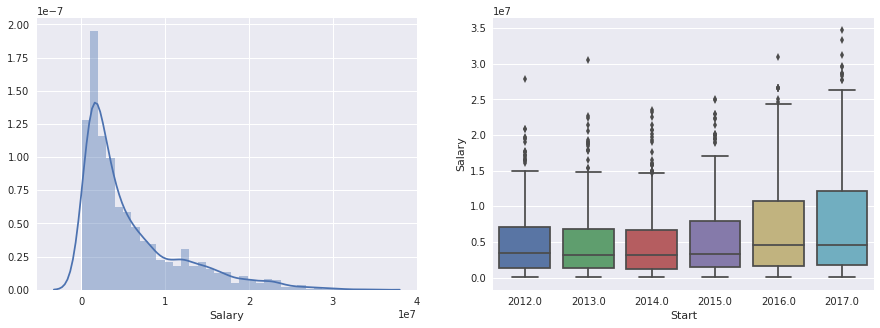

In [26]:
print('Skew:' ,df_salario['Salary'].skew())
print('Kurtosis :',df_salario['Salary'].kurt())

sns.set()
fig,axes=plt.subplots(1,2, figsize=(15,5))
#df_salario['Salary'].hist();
sns.distplot(df_salario['Salary'],ax =axes[0]);
sns.boxplot(df_salario['Start'],df_salario['Salary'],ax =axes[1]);

#df_salario.hist(figsize=(16,20),bins = 50);

### No gráfico de distribuição acima, vimos que há uma distorção com skew positivo.
### Observando o grafico acima, percebe-se que há uma tendencia de aumento dos salários para faixa acima do 3 quartil (75% range).
### O aumento nas faixas menores (1 e 2 quartil) não está sendo realizado na mesma proporção, levando a uma maior variação entre os salarios ao longo dos anos.

# Transformação
### Vamos aplicar a técnica de transformar a variável Target, ou seja a variável que queremos prever, em uma distribuição normal.
### Abaixo iremos converter a variável Salary para a sua raiz quadrada.


Skew: 0.724795757305
Kurtosis : -0.216918272587


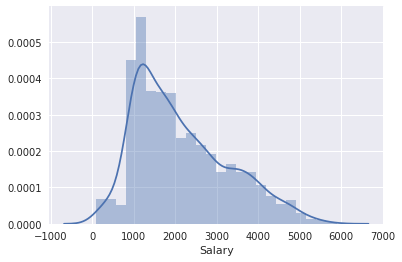

In [27]:
df_salario['Salary']=np.sqrt(df_salario['Salary'])
#sns.set()
sns.distplot(df_salario['Salary']);
print('Skew:' ,df_salario['Salary'].skew())
print('Kurtosis :',df_salario['Salary'].kurt())


### o valor de Skew ficou abaixo de 1, o valor ideal para uma distribuição normal é 0.

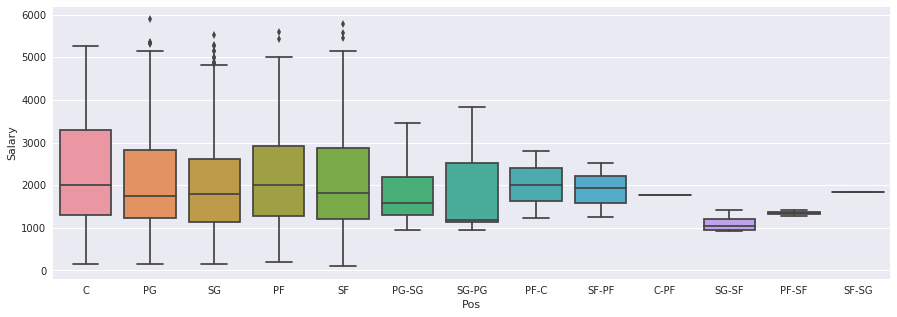

In [28]:
# Salario x Posição
sns.set()
fig, ax=plt.subplots( figsize=(15,5))
#df_salario['Salary'].hist();
sns.boxplot(df_salario['Pos'],df_salario['Salary'],ax= ax);

In [30]:
df_salario['VORP'].describe()

count    2277.000000
mean        0.759376
std         1.393096
min        -1.600000
25%        -0.100000
50%         0.300000
75%         1.300000
max        12.400000
Name: VORP, dtype: float64

## Correlação

In [31]:
#Correlação
cor = df_salario.corr()

In [38]:
variaveis = cor[abs(cor['Salary'])>0.4][['Salary']].sort_values(by='Salary',ascending=False).index
#cor[['Salary']].sort_values(by='Salary',ascending=False)['Salary'].reset_index().head(10)

In [43]:
#plt.rcParams["figure.figsize"] = (15,10)
#df_salario['FG_log']=np.sqrt(df_salario['FG'])
np.abs(cor['Salary']).sort_values(ascending=False).head(15)

Salary    1.000000
FG        0.665893
PTS       0.664985
WS        0.645048
FGA       0.641554
2P        0.641247
2PA       0.629093
FTA       0.623305
FT        0.616322
MP        0.607154
GS        0.590576
OWS       0.587147
DRB       0.584555
VORP      0.580574
TOV       0.578176
Name: Salary, dtype: float64

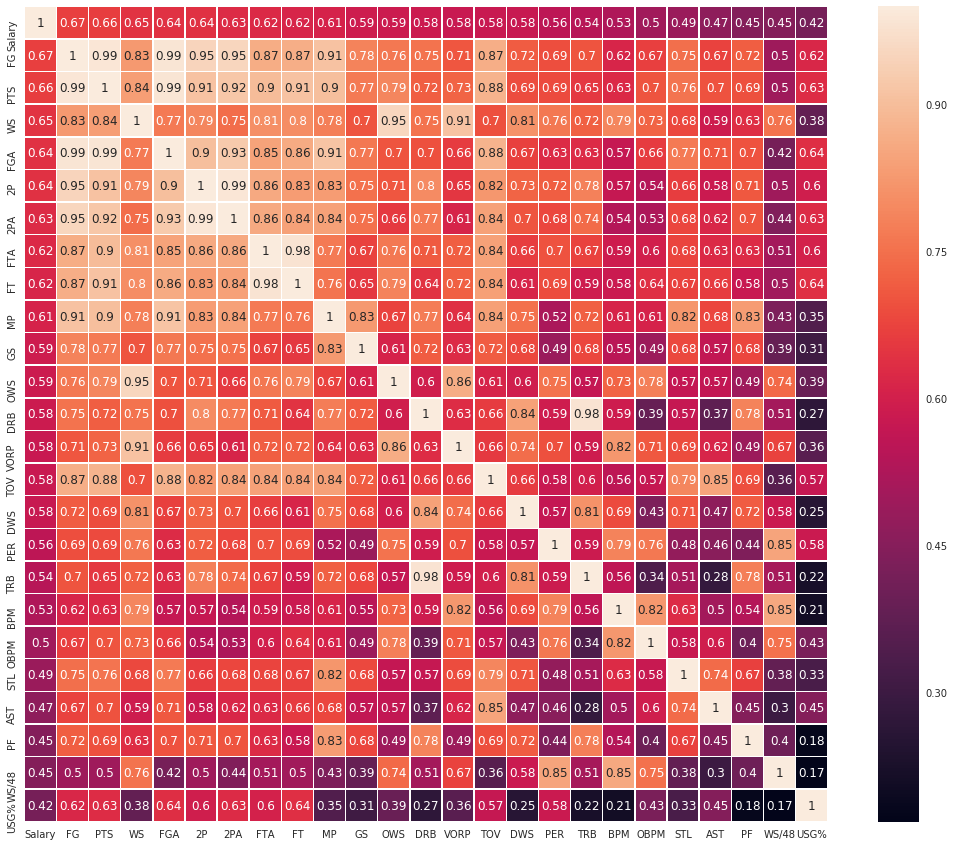

In [34]:
sns.set_style("whitegrid")
#variaveis = ['Salary','WS','VORP','OWS','MP','DWS','Age','BPM','USG%' ,'NBA_DraftNumber']
corr_variaveis = df_salario[variaveis].corr() 
plt.figure(figsize=(18,15))
sns.heatmap(corr_variaveis ,annot = True,linewidths=.5);

## Removendo variáveis devido a colinearidade

In [39]:
variaveis = variaveis.drop(['FG','FGA','2PA','FTA','TRB','OWS'])

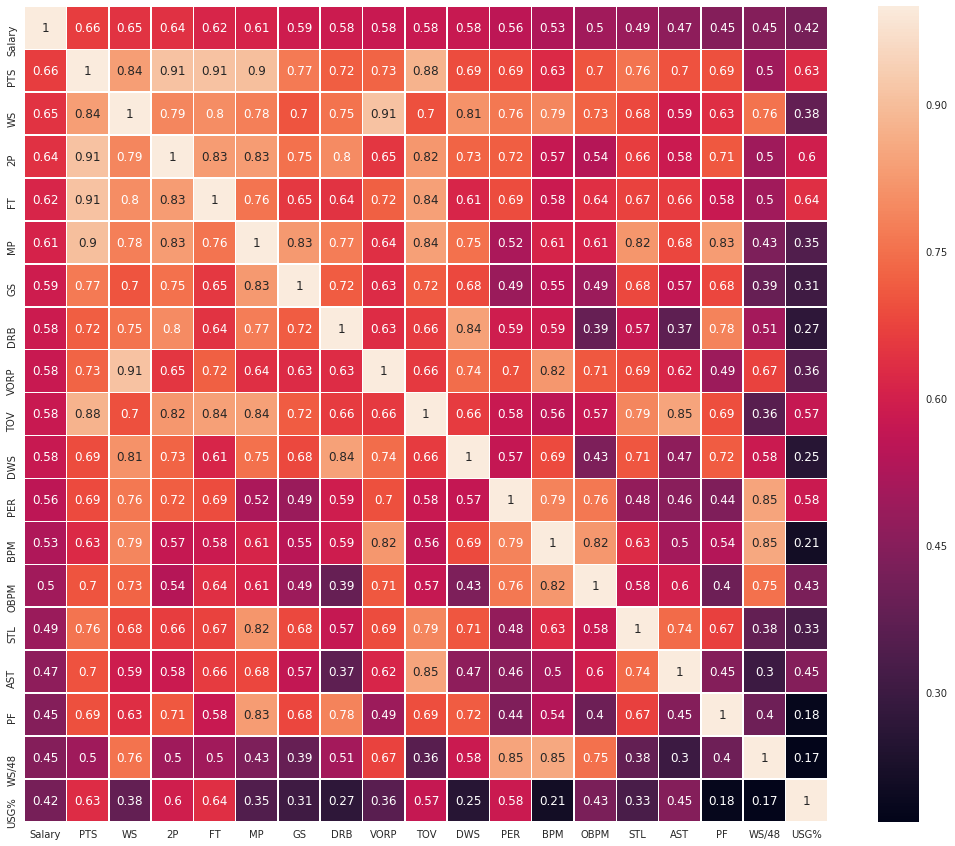

In [40]:
sns.set_style("whitegrid")
#variaveis = ['Salary','WS','VORP','OWS','MP','DWS','Age','BPM','USG%' ,'NBA_DraftNumber']
corr_variaveis = df_salario[variaveis].corr() 
plt.figure(figsize=(18,15))
sns.heatmap(corr_variaveis ,annot = True,linewidths=.5);

In [79]:
np.abs(corr_variaveis['Salary']).sort_values(ascending=False).head(15)

Salary    1.000000
PTS       0.664985
WS        0.645048
2P        0.641247
FT        0.616322
MP        0.607154
GS        0.590576
DRB       0.584555
VORP      0.580574
TOV       0.578176
DWS       0.576777
PER       0.556471
BPM       0.528557
OBPM      0.501525
STL       0.486724
Name: Salary, dtype: float64

## Criando novas variáveis para ajudar no relacionamento não linear 

In [81]:
df_salario['PTS_2']= df_salario['PTS']**2
df_salario['PTS_SQRT']=np.sqrt(df_salario['PTS'])

df_salario['WS_2']= df_salario['WS']**3
df_salario['WS_SQRT']=np.cbrt(df_salario['WS'])

df_salario['2P_2']= df_salario['2P']**2
df_salario['2P_SQRT']=np.sqrt(df_salario['2P'])

df_salario['FT_2']= df_salario['FT']**2
df_salario['FT_SQRT']=np.sqrt(df_salario['FT'])

df_salario['MP_2']= df_salario['MP']**2
df_salario['MP_SQRT']=np.sqrt(df_salario['MP'])

df_salario['GS_2']= df_salario['GS']**2
df_salario['GS_SQRT']=np.sqrt(df_salario['GS'])

df_salario['DRB_2']= df_salario['DRB']**2
df_salario['DRB_SQRT']=np.sqrt(df_salario['DRB'])

df_salario['VORP_2']= df_salario['PTS']**3
df_salario['VORP_SQRT']=np.cbrt(df_salario['VORP'])

df_salario['TOV_2']= df_salario['TOV']**2
df_salario['TOV_SQRT']=np.sqrt(df_salario['TOV'])

df_salario['DWS_2']= df_salario['DWS']**3
df_salario['DWS_SQRT']=np.cbrt(df_salario['DWS'])

df_salario['PER_2']= df_salario['PER']**3
df_salario['PER_SQRT']=np.cbrt(df_salario['PER'])

df_salario['BPM_2']= df_salario['BPM']**3
df_salario['BPM_SQRT']=np.cbrt(df_salario['BPM'])

df_salario['OBPM_2']= df_salario['OBPM']**3
df_salario['OBPM_SQRT']=np.cbrt(df_salario['OBPM'])

df_salario['STL_2']= df_salario['STL']**2
df_salario['STL_SQRT']=np.sqrt(df_salario['STL'])



## Pairplot
### Verificação de relacionamento das variáveis indenpendentes com a variavel "Salary"

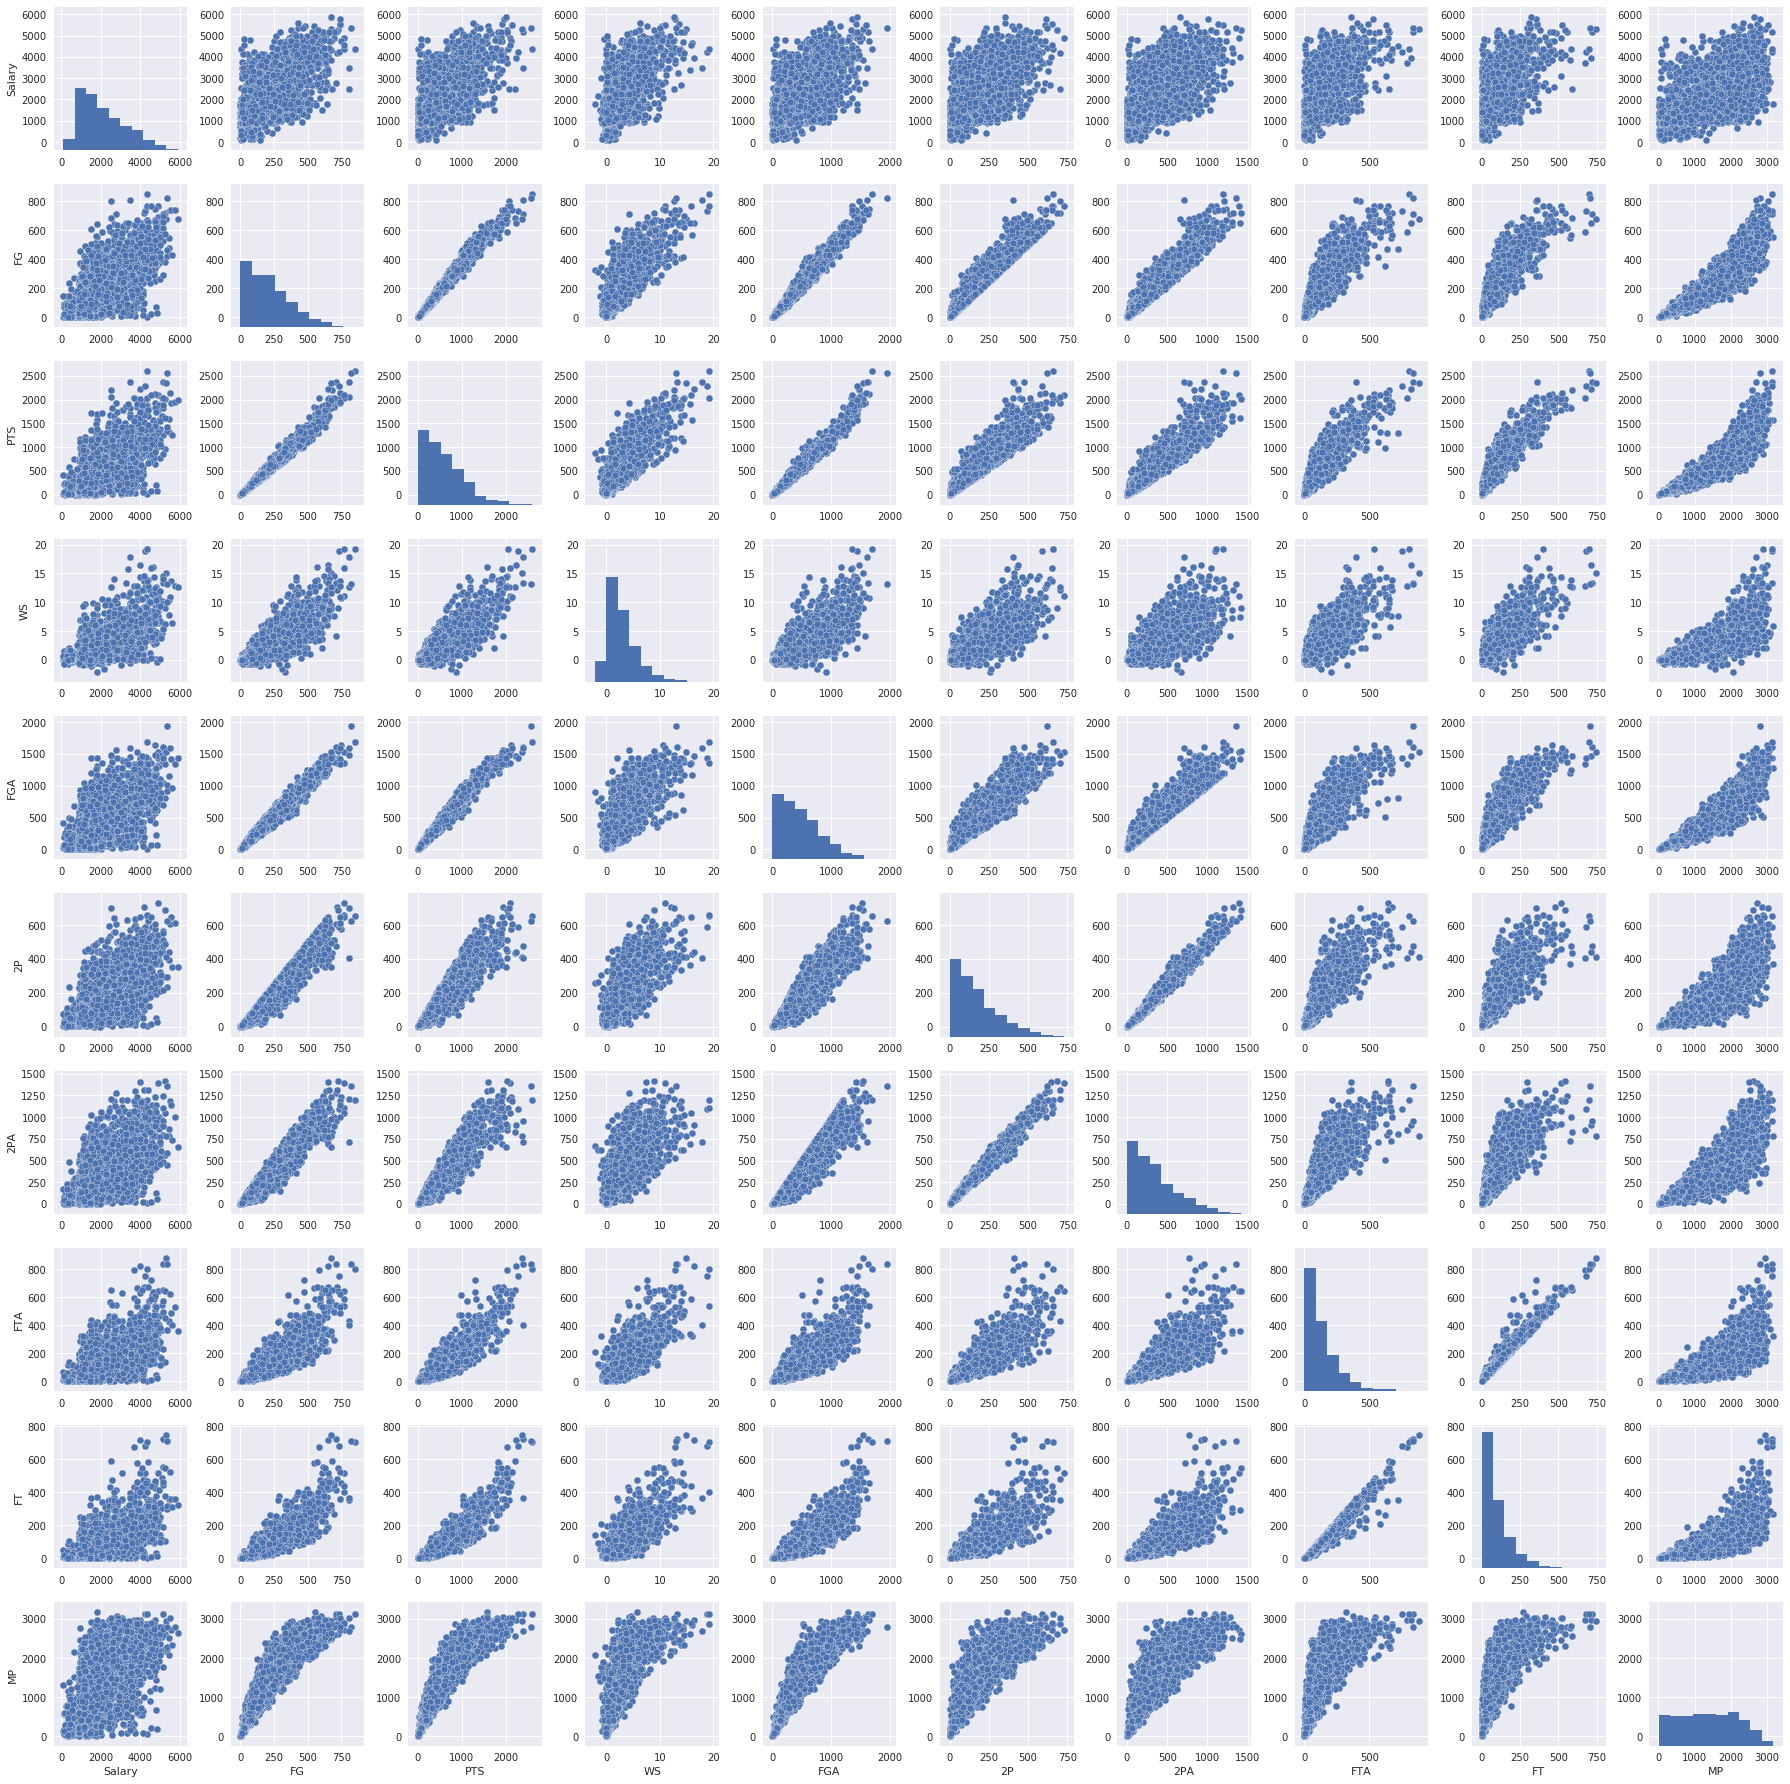

In [41]:
variaveis_corr = cor[abs(cor['Salary'])>0.60][['Salary']].sort_values(by='Salary',ascending=False).index
sns.set()
sns.pairplot(df_salario[variaveis_corr]);

## No gráfico acima, vimos que há algumas variáveis com relacionamento linear quase perfeito (ex: "Pts"-"2P")

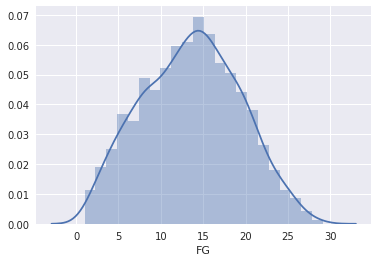

In [35]:
sns.set()
sns.distplot(np.sqrt(df_salario['FG']));

## Analise Exploratória

## Dataset NBA Full stats
#### https://www.kaggle.com/whitefero/nba-players-advanced-season-stats-19782016#NBA%20Players%20-%20Basic%20Season%20Stats%20(1950-2017).xlsx
## About BPM
#### https://www.basketball-reference.com/about/bpm.html
## Glossary
#### https://www.basketball-reference.com/about/glossary.html
## Source dataset
https://www.kaggle.com/meicher/201718-advanced-player-metrics-salary

## Normalidade

### Verificando skewness e kurtosis
#### Skew = mede o grau de simetria da distirbuição da variavel:
#####         < 0 - distribuição negativa ou a esquerda  
#####         0 - distrbuição normal 
#####         > 1 - distrbuição positiva ou a direita)

#### kurtosis mede o grau de achatamento da distribuição 
#####         < 0 - é mais alta referente a distrbuição normal  
#####         0 -   possui um achatamento referente a uma distribuição normal 
#####         > 1 - é mais achatada que uma distrbuição normal


In [37]:
for campo in df_salario[variaveis]:
    print('Skew %s'  % campo, df_salario[campo].skew())
    print('Kurtosis %s ' % campo, df_salario[campo].kurt())
    

Skew Salary 0.724795757305
Kurtosis Salary  -0.216918272587
Skew PTS 1.0279545098
Kurtosis PTS  1.03792502314
Skew WS 1.5228330232
Kurtosis WS  3.2031952874
Skew 2P 1.05049462977
Kurtosis 2P  0.669970068313
Skew FT 2.05808162301
Kurtosis FT  6.17791319885
Skew MP 0.0718953415219
Kurtosis MP  -1.04213886949
Skew GS 0.567586973839
Kurtosis GS  -1.23930053725
Skew OWS 1.89556220031
Kurtosis OWS  5.40195376096
Skew DRB 1.23533299405
Kurtosis DRB  1.83163524295
Skew VORP 2.32431218654
Kurtosis VORP  8.43065439534
Skew TOV 1.2860501256
Kurtosis TOV  2.44486648959
Skew DWS 1.0932001433
Kurtosis DWS  1.14797861148
Skew PER 0.315596968705
Kurtosis PER  0.977911632403
Skew BPM -0.218466306168
Kurtosis BPM  2.82675600787
Skew OBPM -0.0142941063018
Kurtosis OBPM  2.69388634849
Skew STL 1.07588987117
Kurtosis STL  1.11684445093
Skew AST 2.0359591919
Kurtosis AST  5.12964330513
Skew PF 0.143558212502
Kurtosis PF  -0.655892616942
Skew WS/48 -0.372004791067
Kurtosis WS/48  3.06202316768
Skew USG% 0.48

In [50]:
variaveis_p_transf = df_salario[variaveis].skew()[df_salario[variaveis].skew()> 1]

In [56]:
for col in variaveis_p_transf.index:
    df_salario[col]= np.sqrt(df_salario[col])

/home/dataanalysis/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in sqrt
  


## Preparação do dataset para criação do modelo

In [55]:
#Criação das variaveis dummies
df_salario_pos = pd.get_dummies(df_salario['Pos'],drop_first=True)

In [56]:
df_salario_pos.rename(columns={'PF':'PPF'},inplace=True)

In [82]:
#df_salario.drop(['Player','Pos'],axis=1,inplace=True)
df_modelo = df_salario.merge(df_salario_pos,left_index =True,right_index=True, how='inner')

In [83]:
df_modelo.drop(['Pos','Tm','Player'],inplace=True,axis=1)

In [59]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

## Criação do Modelo
### 1 - OLS
### Vamos criar esse primeiro modelo sem nenhum tipo de transformação e tambem sem criação de novas variáveis, apenas utilizando as variaveis com maior grau de correlaçao em relação ao salário


In [60]:
#variaveis.remove('Salary')
df_salario_ols = df_salario[variaveis]

#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'])

In [61]:
X_train.head()

,PTS,WS,2P,FT,MP,GS,DRB,VORP,TOV,DWS,PER,BPM,OBPM,STL,AST,PF,WS/48,USG%
1785,1021.0,4.3,295.0,326.0,2214.0,19.0,165.0,-0.1,148.0,1.2,16.0,-2.2,0.1,49.0,340.0,90.0,0.094,22.7
2209,1067.0,4.0,285.0,116.0,2222.0,67.0,252.0,0.4,119.0,2.3,13.6,-1.3,-0.4,78.0,176.0,155.0,0.085,21.4
34,29.0,0.2,10.0,9.0,68.0,0.0,24.0,0.1,6.0,0.2,21.1,1.5,-2.5,4.0,5.0,15.0,0.146,22.6
1368,533.0,1.3,142.0,63.0,1457.0,41.0,153.0,0.3,61.0,0.6,12.3,-1.1,0.0,52.0,150.0,129.0,0.043,19.2
757,1350.0,7.1,485.0,296.0,2823.0,79.0,499.0,3.2,208.0,2.9,18.8,2.4,1.0,94.0,345.0,258.0,0.121,22.3


In [43]:
#treina o modelo
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     90.07
Date:                Sat, 19 Jan 2019   Prob (F-statistic):          5.54e-240
Time:                        13:35:17   Log-Likelihood:                -13828.
No. Observations:                1707   AIC:                         2.770e+04
Df Residuals:                    1687   BIC:                         2.781e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        986.2716    226.697      4.351      0.000     541.635    1430.908
PTS            0.9105      0.309      2.950      0.003       0.305       1.516
WS          -267.0674    395.763     -0.675      0.500   -1043.306     509.171
2P            -0.6054      0.523     -1.157      0.248      -1.632       0.421
FT             0.9394      0.622      1.511      0.131      -0.280       2.159
MP             0.1409      0.144      0.981      0.327      -0.141       0.423
GS             7.7510      1.283      6.040      0.000       5.234      10.268
OWS          309.5715    396.472      0.781      0.435    -468.058    1087.201
DRB            1.6889      0.436      3.870      0.000       0.833       2.545
VORP        -154.8177     65.424     -2.366      0.018    -283.138     -26.497
TOV           -4.7308      1.425     -3.321      0.001      -7.525      -1.936
DWS          453.1841    397.695      1.140      0.255    -326.843    1233.211
PER           10.7827     22.011      0.490      0.624     -32.389      53.954
BPM          113.9577     25.772      4.422      0.000      63.410     164.505
OBPM         -38.9820     27.643     -1.410      0.159     -93.201      15.237
STL           -6.0272      1.482     -4.067      0.000      -8.934      -3.120
AST            1.6336      0.418      3.908      0.000       0.814       2.453
PF            -3.6850      0.718     -5.134      0.000      -5.093      -2.277
WS/48      -1550.5805   1516.668     -1.022      0.307   -4525.329    1424.168
USG%          32.4884     13.343      2.435      0.015       6.319      58.658
==============================================================================
Omnibus:                       60.863   Durbin-Watson:                   1.951
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.595
Skew:                           0.451   Prob(JB):                     2.10e-15
Kurtosis:                       3.372   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Analisando o modelo gerado, temos variáveis que possuem um p-value (P>|t|) muito baixo, indicando<br>que é improvavel que a associação da variável independente e "Salary" seja por acaso.

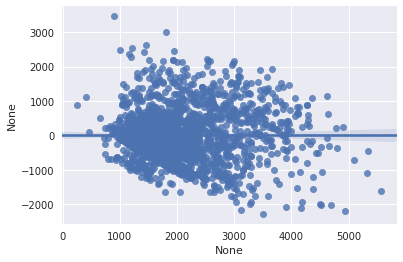

In [45]:
sns.regplot(x= model.fittedvalues,y=model.resid)

### No grafico acima, há uma espécie de formação de cone.
## Na regressão linear, os residuos não devem ter correlaçao com os valores previstos. Nesse caso uma alternativa para este problema seria transformar a variavel dependente, ou seja a coluna "salary" com a raiz quadrada ou o log 


## Cross Validation

In [63]:
modelo_reg = LinearRegression()
score = cross_val_score(modelo_reg,df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'],cv= 5)

In [64]:
score.mean()

0.50328062192965217

## Ridge e Lasso

In [66]:
df_modelo.shape

(2277, 78)

In [67]:
# Seleciona as variaveis numericas
df_salario_num = df_salario.select_dtypes(include = ['float64']).columns
df_salario_num= df_salario_num.drop('Salary')

In [84]:
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_modelo.loc[:,df_modelo.columns !='Salary'],df_modelo.loc[:,'Salary'])

In [85]:
X_train.loc[:,df_salario_num].head()

,Start,Age,G,GS,MP,PER,TS%,3PAr,FTr,ORB%,...,MP_2,MP_SQRT,GS_2,GS_SQRT,DRB_2,DRB_SQRT,VORP_2,VORP_SQRT,TOV_2,TOV_SQRT
200,2015.0,22.0,64.0,21.0,1243.0,15.2,0.578,0.000,0.941,13.7,...,1545049.0,35.256205,441.0,4.582576,61504.0,15.748016,2.809446e+07,0.793701,2704.0,7.211103
633,2012.0,24.0,45.0,1.0,559.0,8.1,0.405,0.000,0.209,7.1,...,312481.0,23.643181,1.0,1.000000,7921.0,9.433981,1.860867e+06,-0.669433,625.0,5.000000
584,2015.0,36.0,77.0,77.0,2282.0,19.2,0.560,0.258,0.272,2.1,...,5207524.0,47.770284,5929.0,8.774964,170569.0,20.322401,2.368593e+09,1.144714,6724.0,9.055385
1226,2016.0,20.0,63.0,9.0,671.0,8.2,0.507,0.374,0.232,4.1,...,450241.0,25.903668,81.0,3.000000,11664.0,10.392305,1.314426e+07,-0.887904,1156.0,5.830952
693,2013.0,25.0,73.0,54.0,2012.0,18.3,0.552,0.267,0.196,7.9,...,4048144.0,44.855323,2916.0,7.348469,133956.0,19.131126,8.902771e+08,1.238562,5625.0,8.660254


In [86]:
std = StandardScaler()
X_train.loc[:,df_salario_num] = std.fit_transform(X_train.loc[:,df_salario_num])
X_test.loc[:,df_salario_num] = std.transform(X_test.loc[:,df_salario_num])

In [87]:
reg = RidgeCV(alphas=[0.1, 1.0, 10.0,20.0], cv=10,normalize=False,fit_intercept=True).fit(X_train,y_train)       
reg.score(X_train,y_train)


0.63067119755489742

In [88]:
reg.alpha_

1.0

In [89]:
y_pred = reg.predict(X_test)
rmse(y_pred,y_test)

729.21507253902701

In [90]:
for i in range(0,len(reg.coef_)):
    print(X_train.columns[i],reg.coef_[i])

Start 255.928308845
Age 171.737089299
G -597.113239635
GS -324.170742293
MP 346.339310056
PER -111.351901762
TS% -122.936409508
3PAr -268.423797254
FTr -19.248549703
ORB% -3.57347156178
DRB% 97.5618469824
TRB% -299.330470053
AST% -195.727134636
STL% -48.940735065
BLK% 76.1724136268
TOV% 176.601784062
USG% 511.783010884
OWS 341.956154119
DWS 242.115072481
WS -28.1573588804
WS/48 216.064650427
OBPM 47.9934890883
DBPM -260.909448809
BPM 318.553327834
VORP -257.871274796
FG 249.35806982
FGA -211.712449721
FG% 57.1763301246
3P -215.659888569
3PA 250.490585458
3P% 6.71629931226
2P 365.334948664
2PA -384.863930845
2P% 14.3726964054
eFG% -134.584241854
FT -81.576165333
FTA 357.991294939
FT% -1.41015538778
ORB -8.91330822258
DRB 22.8864580633
TRB 13.6991684947
AST 185.306003013
STL -509.02710932
BLK 15.0676934195
TOV -225.729564643
PF -210.066375336
PTS 137.254509031
PTS_2 536.773320383
PTS_SQRT -678.787133415
WS_2 -108.67734974
WS_SQRT -79.778239567
2P_2 32.9080945944
2P_SQRT -489.614915677
FT

## Lasso

In [94]:
lasso = LassoCV(alphas=[0.1,0.3,0.5,1.0, 10.0,20.0,30.0,50.0], cv=10,normalize=False,fit_intercept=True).fit(X_train,y_train)       
lasso.score(X_train,y_train)


/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.62799573695743294

In [95]:
y_pred = lasso.predict(X_test)
rmse(y_pred,y_test)

726.83544015363248

In [96]:
lasso.alpha_

0.5

In [97]:
for i in range(0,len(lasso.coef_)):
    print(X_train.columns[i],lasso.coef_[i])

Start 254.922513072
Age 174.387931857
G -596.564525411
GS -187.880001415
MP -0.0
PER -59.1348646361
TS% -157.561217434
3PAr -216.155070853
FTr -2.69557391034
ORB% -60.9176196165
DRB% -0.0
TRB% -119.1695431
AST% -178.271626602
STL% -7.13528190999
BLK% 58.7307625177
TOV% 195.034126568
USG% 445.481836145
OWS 327.336425831
DWS 236.909204909
WS 0.0
WS/48 189.495757054
OBPM 230.127079304
DBPM -63.4226222586
BPM 0.0
VORP -218.47273306
FG 0.0
FGA -0.0
FG% 0.0
3P -77.1637673435
3PA 135.776854121
3P% -1.50263076071
2P 21.674122576
2PA -384.56837415
2P% 10.3050413705
eFG% -47.145753204
FT -0.0
FTA 292.818500766
FT% -0.0
ORB -1.55907074576
DRB 101.882649368
TRB 0.0
AST 163.469555597
STL -174.384891623
BLK 16.0599998219
TOV -0.0
PF -192.703339455
PTS 7.47482477292
PTS_2 377.944190101
PTS_SQRT -489.015524059
WS_2 -111.653222693
WS_SQRT -75.575580781
2P_2 163.375584873
2P_SQRT -0.0
FT_2 -51.1753875405
FT_SQRT -296.850317578
MP_2 -176.177692628
MP_SQRT 1479.50439977
GS_2 155.702976441
GS_SQRT 76.11409

## Adicionando termo de interação

In [152]:
df_salario_ols = df_salario[cols_nums].copy()
df_salario_ols['Salary'] = np.sqrt(df_salario_ols['Salary']) 
df_salario_ols['2P_X_BPM'] = df_salario_ols['2P%'] * df_salario_ols['BPM']
df_salario_ols['Start_X_BPM'] = df_salario_ols['Start'] * df_salario_ols['BPM']
#Separando arquivo em treino e teste
X_train,X_test,y_train,y_test = train_test_split(df_salario_ols.loc[:,df_salario_ols.columns !='Salary'],df_salario_ols.loc[:,'Salary'])

In [106]:
#treina o modelo
X = sm.add_constant(X_train)
model= sm.OLS(y_train,X).fit()

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.510
Model:                            OLS   Adj. R-squared:                  0.504
Method:                 Least Squares   F-statistic:                     79.74
Date:                Sat, 05 Jan 2019   Prob (F-statistic):          6.16e-242
Time:                        22:28:01   Log-Likelihood:                -13816.
No. Observations:                1707   AIC:                         2.768e+04
Df Residuals:                    1684   BIC:                         2.780e+04
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1076.6044    186.891      5.761      0.000     710.042    1443.167
PTS           -0.7589      1.182     -0.642      0.521      -3.078       1.560
FG             0.9136      0.434      2.104      0.036       0.062       1.765
WS         -1160.1981    408.044     -2.843      0.005   -1960.526    -359.871
FTA            1.3523      1.200      1.127      0.260      -1.002       3.706
2P             4.0676      2.378      1.711      0.087      -0.596       8.732
FT             0.5679      1.706      0.333      0.739      -2.779       3.915
FGA            2.6040      1.363      1.910      0.056      -0.070       5.278
2PA           -2.3095      1.394     -1.656      0.098      -5.045       0.426
VORP          59.6835     93.936      0.635      0.525    -124.559     243.926
OWS         1266.8728    408.029      3.105      0.002     466.575    2067.170
GS            15.0000      2.345      6.397      0.000      10.401      19.599
TOV            0.0548      0.942      0.058      0.954      -1.792       1.902
DRB            5.3984      1.098      4.918      0.000       3.245       7.551
MP            -0.5828      0.151     -3.853      0.000      -0.880      -0.286
PER           13.2310     12.435      1.064      0.287     -11.158      37.620
DWS         1243.5647    408.599      3.043      0.002     442.149    2044.980
TRB           -3.2906      0.782     -4.207      0.000      -4.825      -1.756
BPM           -0.9641     20.171     -0.048      0.962     -40.527      38.598
PTS_X_BPM      0.0015      0.041      0.038      0.970      -0.078       0.081
GS_X_BPM       0.6618      0.572      1.158      0.247      -0.460       1.783
GS_X_PTS      -0.0114      0.003     -4.468      0.000      -0.016      -0.006
VORP_X_WS    -15.7338      5.036     -3.124      0.002     -25.610      -5.857
BPM_X_PER      1.0206      1.406      0.726      0.468      -1.737       3.778
==============================================================================
Omnibus:                       72.540   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.124
Skew:                           0.447   Prob(JB):                     2.69e-20
Kurtosis:                       3.683   Cond. No.                     1.92e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.41e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [153]:
lasso = LassoCV(alphas=[0.01,0.05,0.1, 0.5, 1.0, 10.0,20.0], cv=10,normalize=True,fit_intercept=True).fit(X_train,y_train)       
lasso.score(X_train,y_train)


/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/dataanalysis/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.59360245505579323

In [154]:
lasso.alpha_

0.01

In [155]:
for i in range(0,len(lasso.coef_)):
    print(X_train.columns[i],lasso.coef_[i])

Start 137.880937393
Age 40.2707852663
G -18.9548630878
GS 0.919831305056
MP 0.810179382262
PER -9.03170905512
TS% -2745.40111469
3PAr -947.663111578
FTr -443.349319488
ORB% -20.1457207029
DRB% 11.1700575015
TRB% -0.0
AST% -30.4298741314
STL% -230.606093722
BLK% -13.9839355645
TOV% 33.4013376802
USG% 61.3735407237
OWS 119.497329736
DWS 292.954226258
WS -0.0
WS/48 -1965.72161055
OBPM 135.217378454
DBPM -0.0
BPM 1.31136762591
VORP -345.347064265
FG 1.08482845863
FGA -0.364129522552
FG% 0.0
3P -0.691521598289
3PA 0.0724841491046
3P% -66.6584073177
2P 1.92441697893
2PA -2.03729480791
2P% 53.7530526352
eFG% -488.08561715
FT -0.594730874984
FTA 1.41876842518
FT% -186.348930224
ORB -0.0
DRB 0.568647972575
TRB 0.0
AST 1.70481248656
STL 0.961288272949
BLK 0.687867954
TOV -1.3694205701
PF -2.95293522415
PTS 0.0
2P_X_BPM 63.9866142331
Start_X_BPM 0.0487702589897


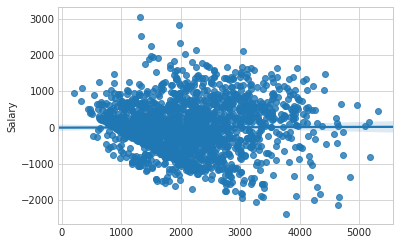

In [156]:
sns.regplot(lasso.predict(X_train) ,(y_train - lasso.predict(X_train)));

## VIF - Variance Inflation Factor

### Metodo utilizado para identificar multicolinearidade

In [55]:
cnames = X_train.columns
for i in np.arange(0,len(cnames)):
    xvars = list(cnames)
    yvar = xvars.pop(i)
    mod = sm.OLS(X_train[yvar],sm.add_constant( X_train[xvars]))
    res = mod.fit()
    vif = 1/(1-res.rsquared)
    print (yvar,round(vif,3))

2P 101.783
FGA 28.16
2PA 115.324
OWS 4.276
GS 3.589
DRB 51.964
MP 11.694
DWS 4.774
TRB 48.68
BPM 2.678
